In [1]:
# NaN 값 처리 신중하게 하기 
# 보통 카테고리의 전처리는 단순하게 (0, 1, 2, 3,...) 으로 한다.
# 분석에 넣을 변수는 10개 이하로 하는게 통상적이다.
# 현재는 유의미한 변수 골라내는 정도로 하기 

### 1) 데이터 전체 훑어보기 
* 결론 : pd.count() 를 통해서 value가 군데 군데 빠진 것을 확인함. (이후 전처리 필요)

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
hp = pd.read_csv('./train.csv')
hp.shape

(1460, 81)

In [4]:
# hp.count()
vch = hp.count()
vch[vch != 1460]

LotFrontage     1201
Alley             91
MasVnrType      1452
MasVnrArea      1452
BsmtQual        1423
BsmtCond        1423
BsmtExposure    1422
BsmtFinType1    1423
BsmtFinType2    1422
Electrical      1459
FireplaceQu      770
GarageType      1379
GarageYrBlt     1379
GarageFinish    1379
GarageQual      1379
GarageCond      1379
PoolQC             7
Fence            281
MiscFeature       54
dtype: int64

### 2) 각 feature 별, SalePrice 와 관계 정도 파악하기 

* 1) MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

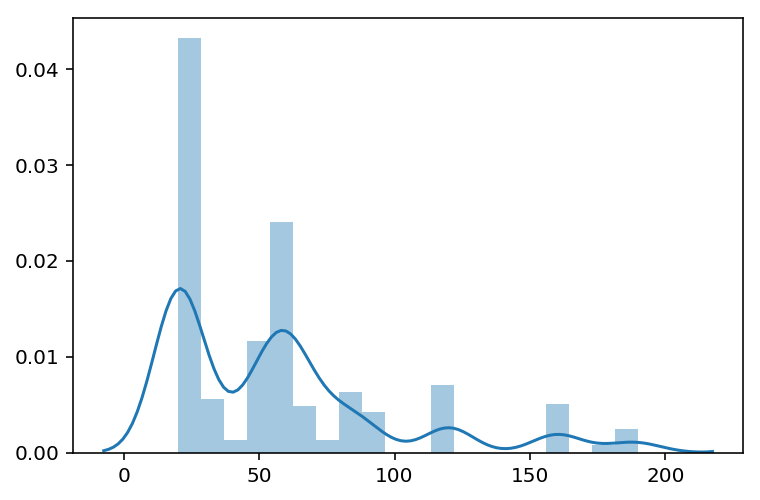

In [5]:
# 1) MSSubClass 칼럼의 value count
sns.distplot(hp.MSSubClass.values, kde=True)
plt.show()

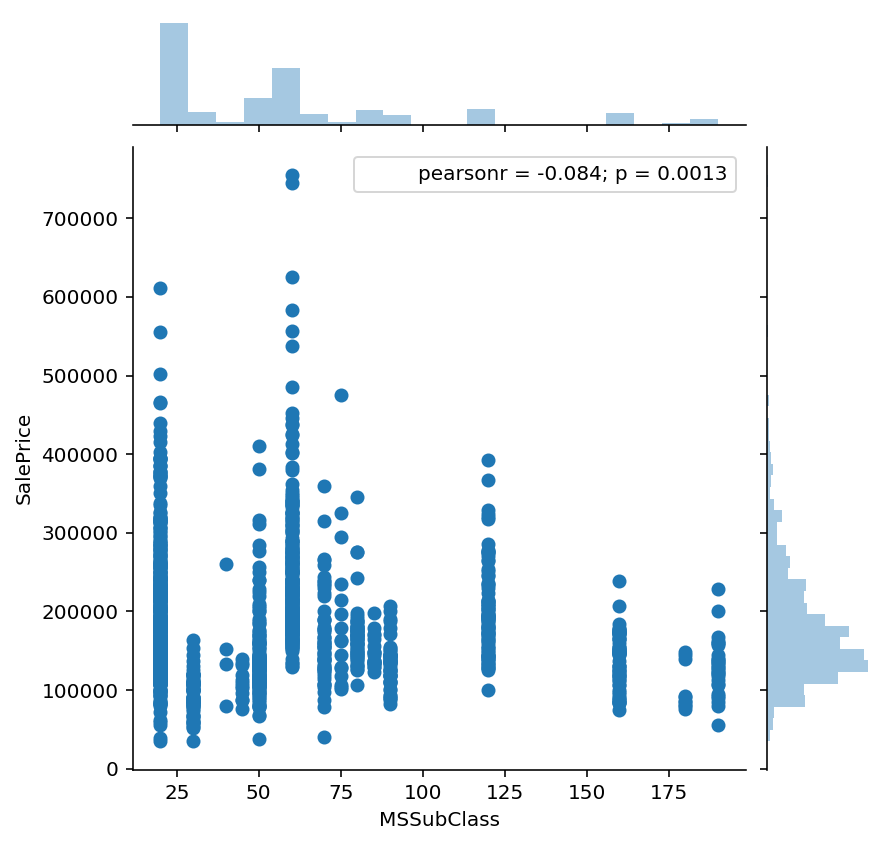

In [6]:
# MSSubClass의 target과의 상관계수 
sns.jointplot(x='MSSubClass', y='SalePrice', data=hp)

* 2) MSZoning: Identifies the general zoning classification of the sale.
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [7]:
# 전처리 
def f1(char):
    if char == 'A':
        return 0
    elif char == 'C':
        return 1
    elif char == 'FV':
        return 2
    elif char == 'I':
        return 3
    elif char == 'RH':
        return 4
    elif char == 'RL':
        return 5
    elif char == 'RP':
        return 6
    elif char == 'RM':
        return 7

hp1 = hp['MSZoning'].apply(f1)
hp1.tail()

1455    5.0
1456    5.0
1457    5.0
1458    5.0
1459    5.0
Name: MSZoning, dtype: float64

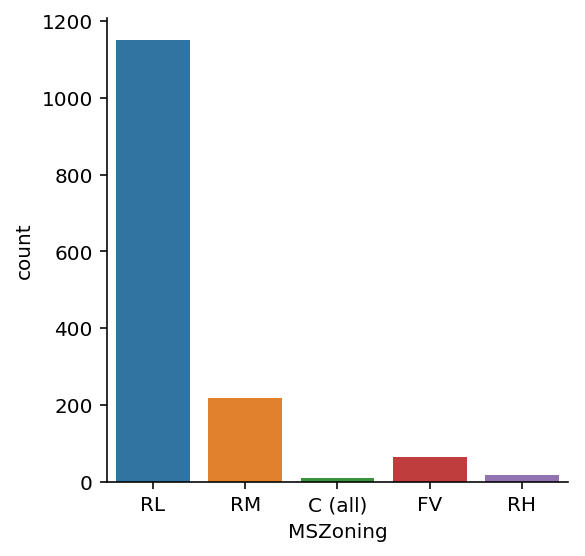

In [8]:
#MSZoning 칼럼의 value count
sns.factorplot(x='MSZoning', kind='count', data=hp)

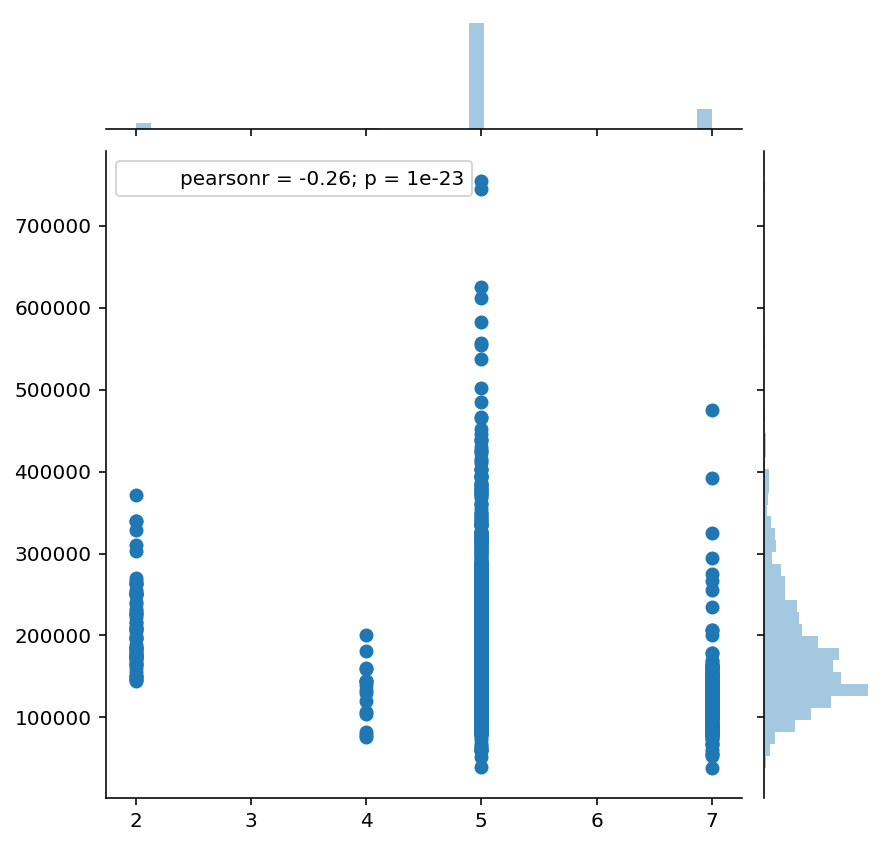

In [9]:
# MSSubClass의 target과의 상관계수 
sns.jointplot(x=hp1.values, y=hp.SalePrice.values)

* 3) LotFrontage: Linear feet of street connected to property

       Grvl	Gravel(자갈길, 비포장도로)	
       Pave	Paved (포장도로)


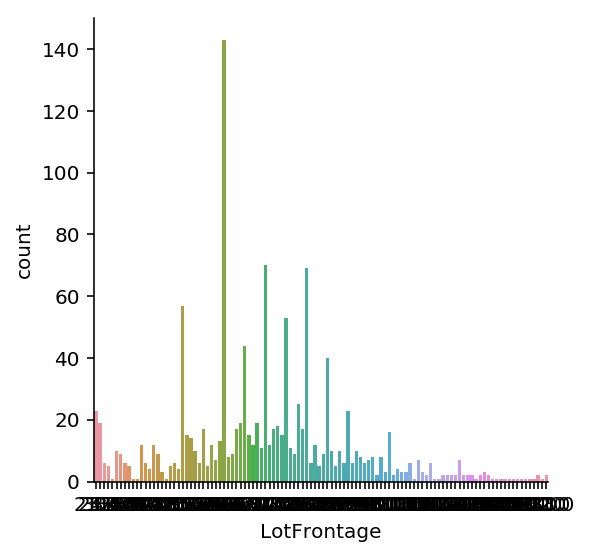

In [10]:
# LotFrontage 칼럼의 value counts
sns.factorplot(x='LotFrontage', kind='count', data=hp)

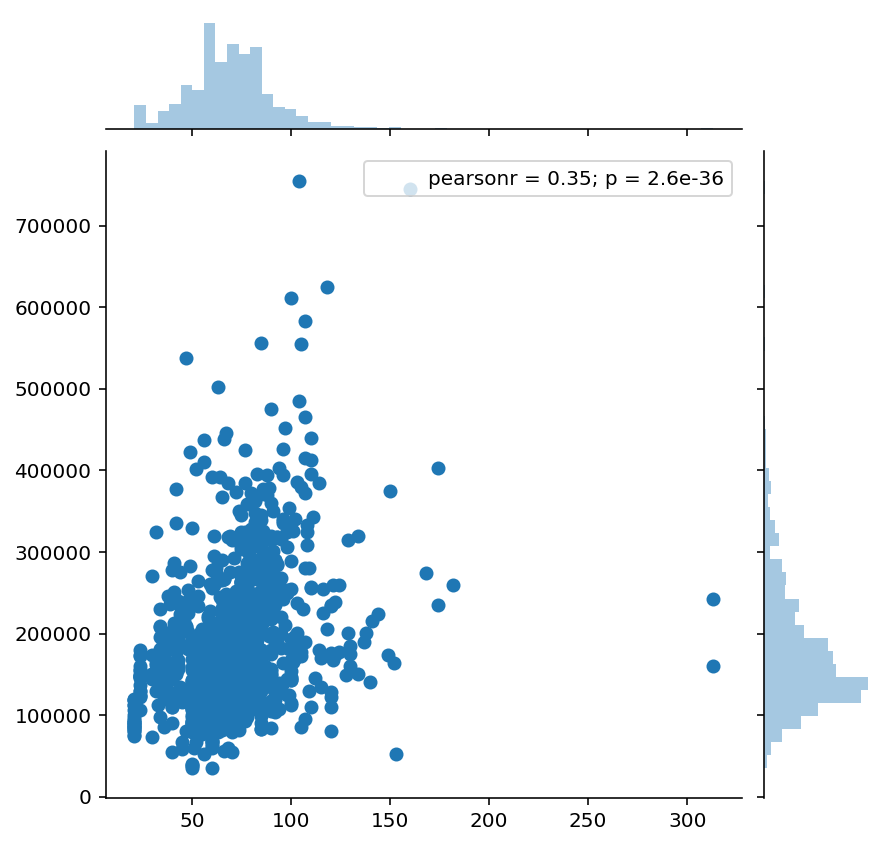

In [11]:
# LotFrontage 칼럼과 target의 상관계수 
sns.jointplot(x=hp.LotFrontage.values, y=hp.SalePrice.values, data=hp)

* 4) LotArea: Lot size in square feet

       Grvl	Gravel(자갈길, 비포장도로)	
       Pave	Paved (포장도로)


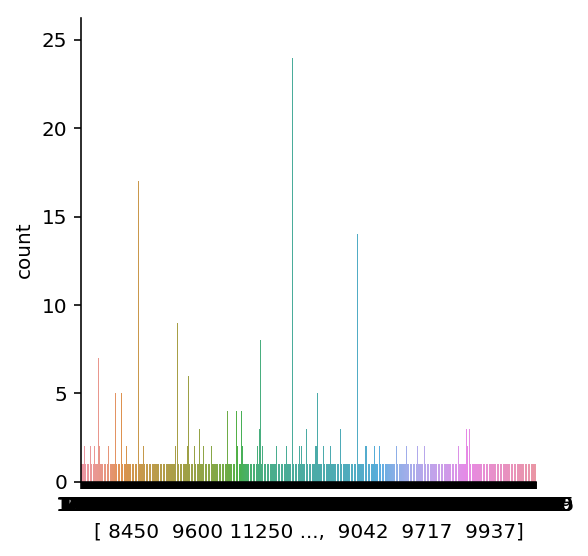

In [12]:
# LotArea의 value count
sns.factorplot(x=hp.LotArea.values, kind='count', data=hp)

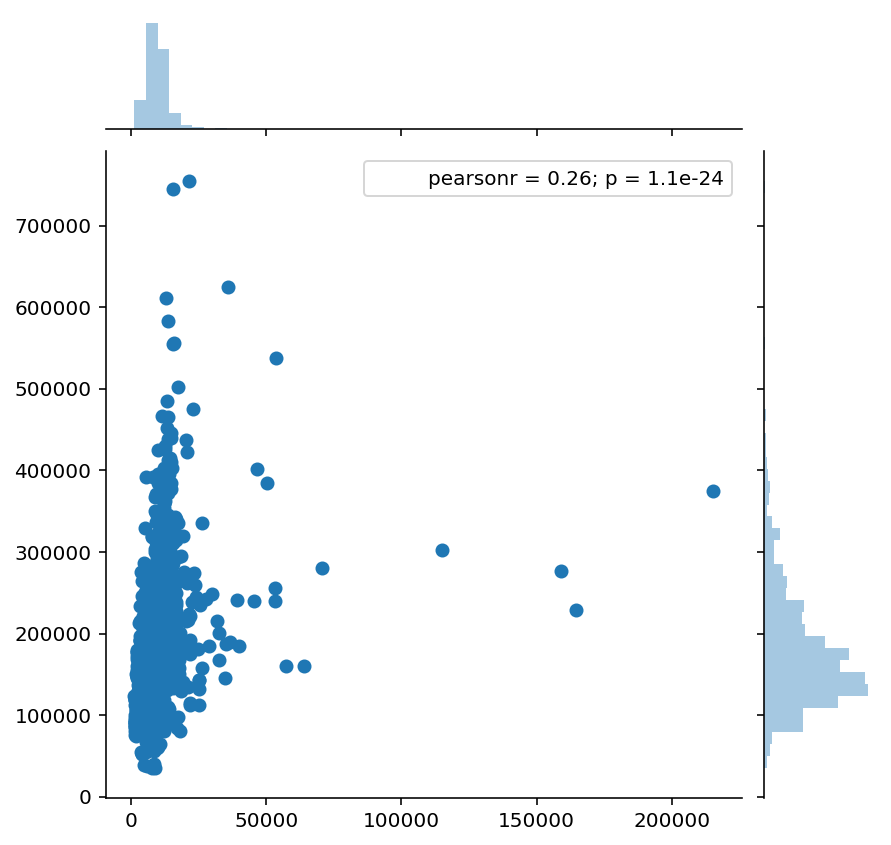

In [13]:
# LotArea 와 target 과의 상관계수 
sns.jointplot(x=hp.LotArea.values, y=hp.SalePrice.values, data=hp)

* 5) Street: Type of road access to property

       Grvl	Gravel(자갈길, 비포장도로)	
       Pave	Paved (포장도로)


In [14]:
#전처리 
def f2(char):
    if char == 'Grvl':
        return 0
    if char == 'Pave':
        return 1

hp2 = hp['Street'].apply(f2)
hp2.tail()

1455    1
1456    1
1457    1
1458    1
1459    1
Name: Street, dtype: int64

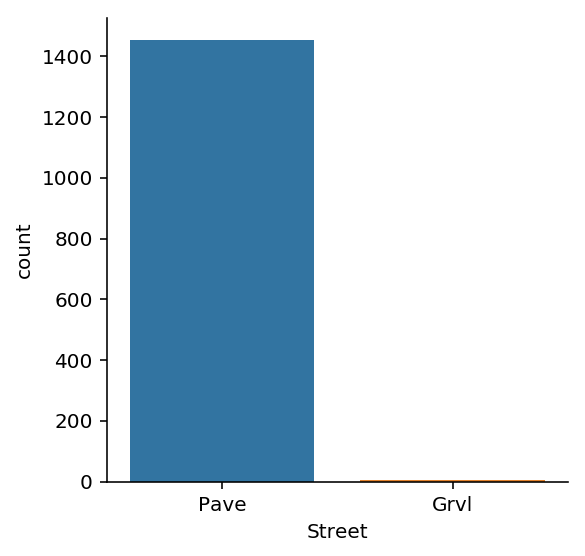

In [15]:
# Street 컬럼의 value count
sns.factorplot(x='Street', kind='count', data=hp)

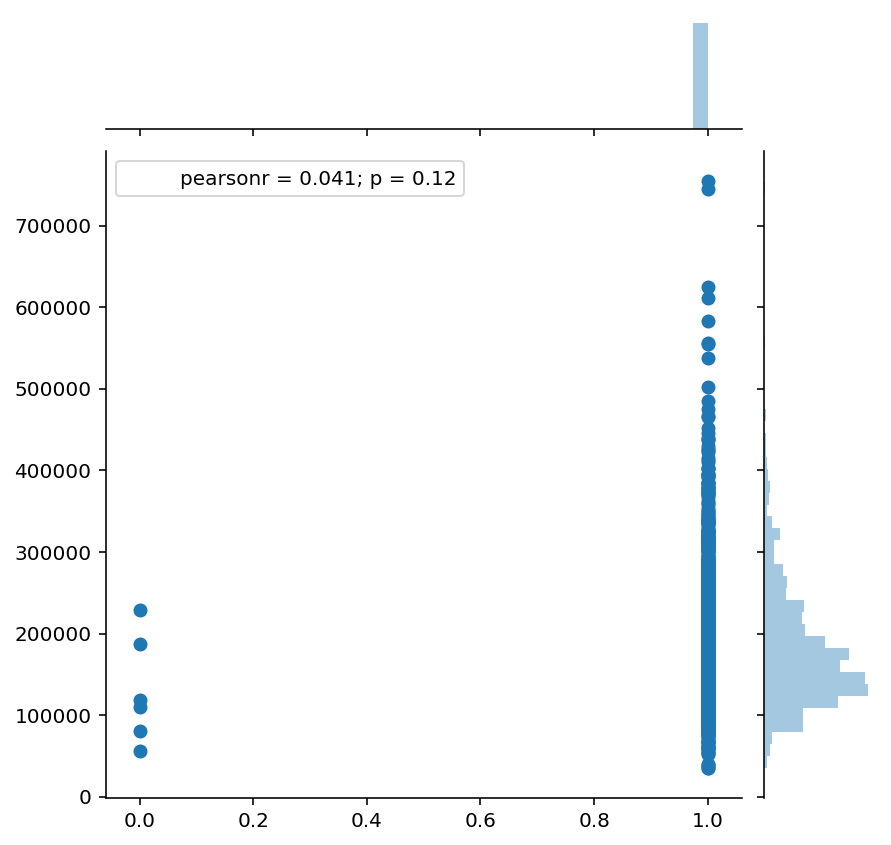

In [16]:
# Street 칼럼의 target 과의 상관계수 
sns.jointplot(x=hp2.values, y=hp.SalePrice.values)

* 6) Alley: Type of alley access to property (부지로 연결된 샛길, 작은길의 포장 여부)

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
- 평 : "(Gravel 50, Paved 41, NaN 1369) 대부분의 Observation 이 샛길이 없는 것으로 나타남"

In [17]:
# 전처리 
hp['Alley'] = hp['Alley'].fillna('NaN')
def f3(char):
    if char == 'Grvl':
        return 0 
    elif char == 'Pave':
        return 1
    elif char == 'NaN':
        return 2

hp3 = hp['Alley'].apply(f3)
hp3.tail()

1455    2
1456    2
1457    2
1458    2
1459    2
Name: Alley, dtype: int64

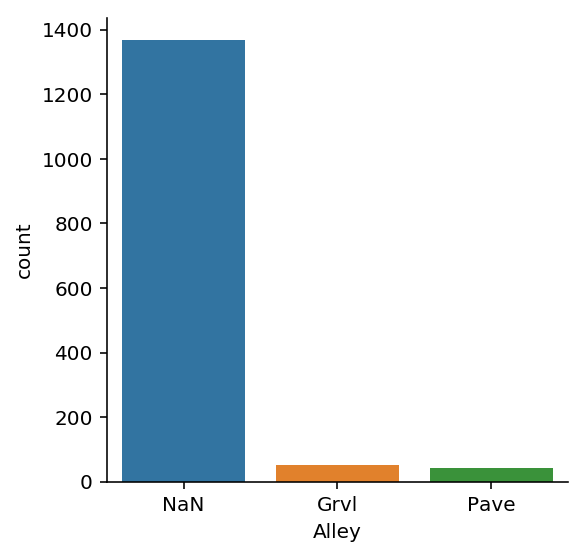

In [18]:
# Alley 칼럼의 value count
sns.factorplot(x='Alley', data=hp, kind='count')

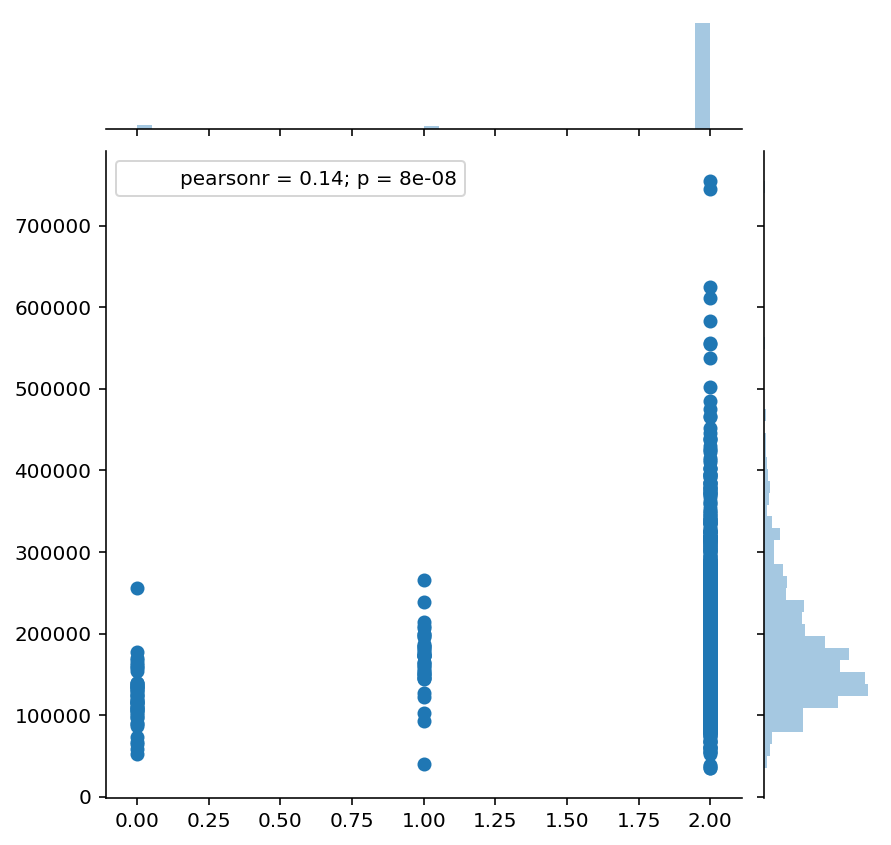

In [19]:
# Alley 칼럼의 target 과의 상관관계 
sns.jointplot(x=hp3.values, y=hp.SalePrice.values)

* 7) LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       


In [20]:
#전처리 

def f4(char):
    if char == 'Reg':
        return 0
    elif char == 'IR1':
        return 1
    elif char == 'IR2':
        return 2
    elif char == 'IR3':
        return 3

hp4 = hp['LotShape'].apply(f4)
hp4.tail()

1455    0
1456    0
1457    0
1458    0
1459    0
Name: LotShape, dtype: int64

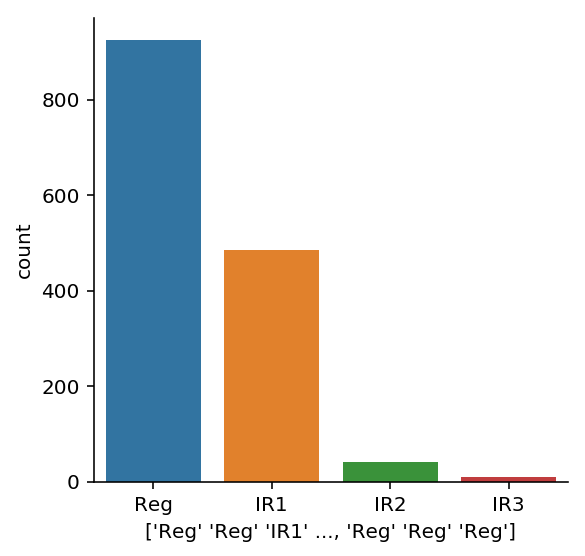

In [21]:
# LotShape 칼럼의 value count
sns.factorplot(x=hp.LotShape.values, kind='count', data=hp)

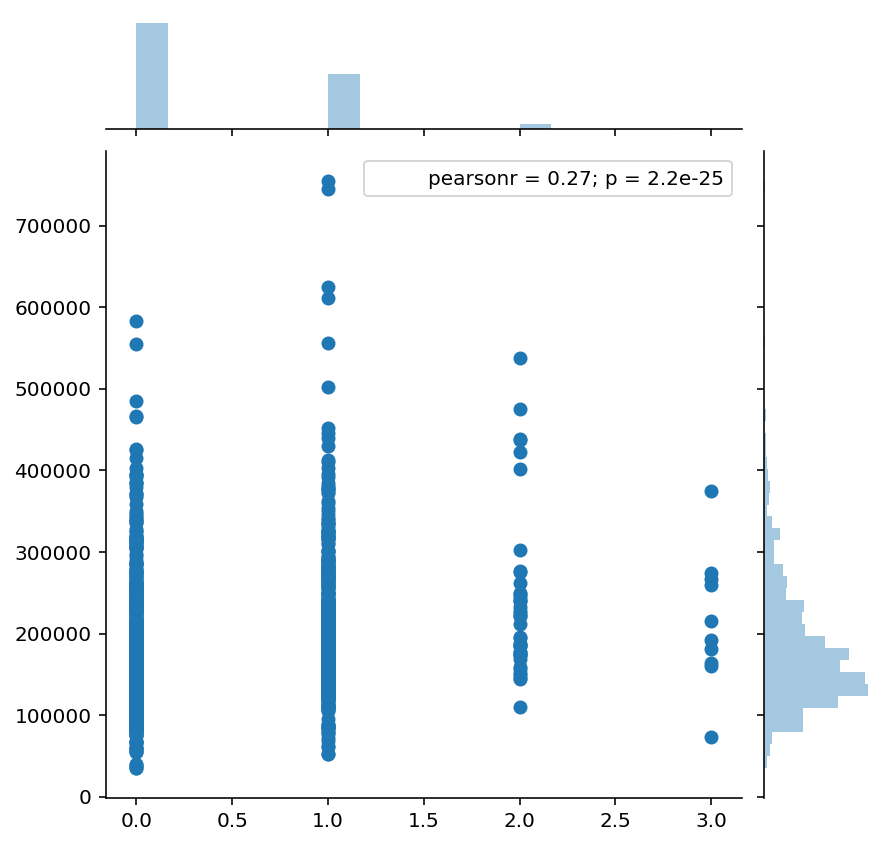

In [22]:
# LotShape 칼럼과 target의 상관관계 
sns.jointplot(x=hp4.values, y=hp.SalePrice.values)

* 8) LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
       


In [23]:
# 전처리 
def f5(char):
    if char == 'Lvl':
        return 0
    elif char == 'Bnk':
        return 1
    elif char == 'HLS':
        return 2
    elif char == 'LOW':
        return 3
    
hp5 = hp['LandContour'].apply(f5)
hp5.tail()

1455    0.0
1456    0.0
1457    0.0
1458    0.0
1459    0.0
Name: LandContour, dtype: float64

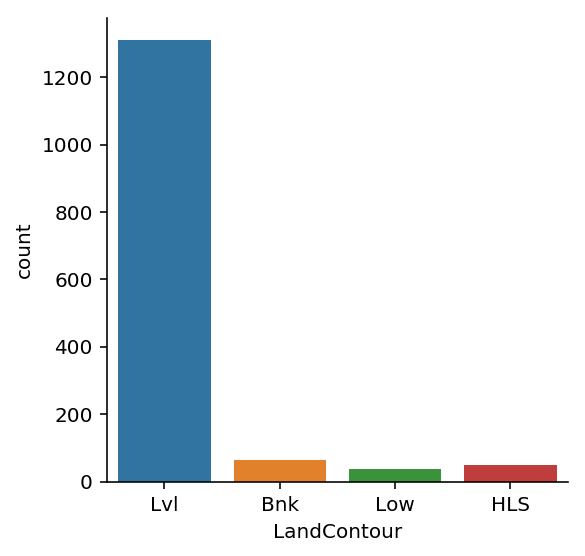

In [24]:
# LandContour 칼럼의 value count
sns.factorplot(x='LandContour', kind='count', data=hp)

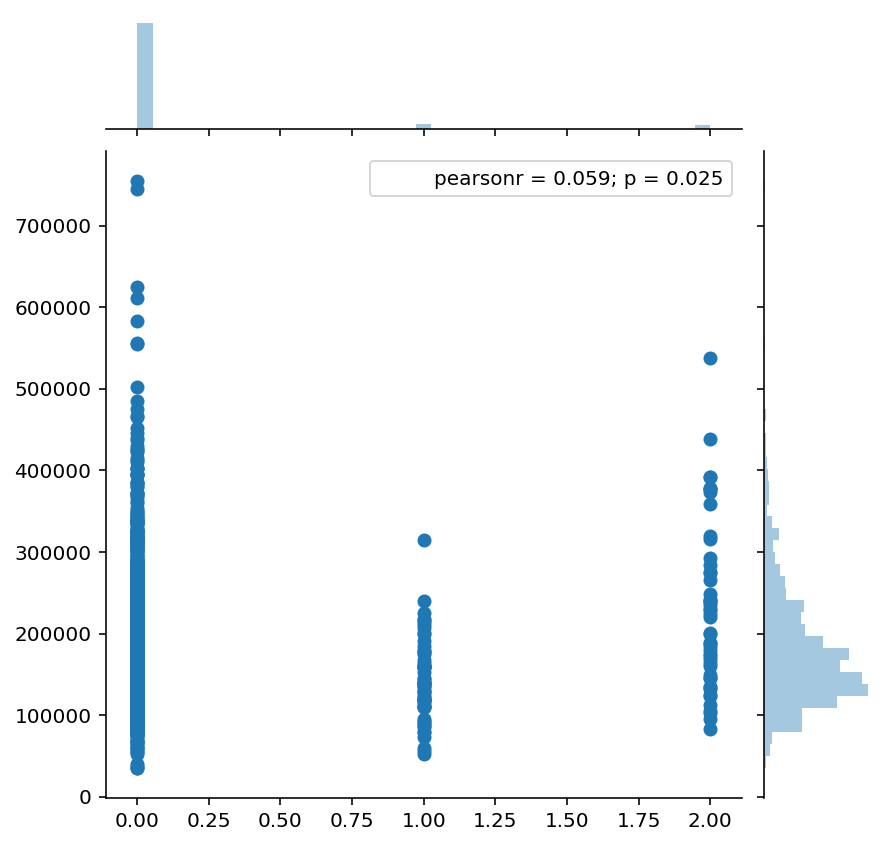

In [25]:
# LandContour 칼럼의 target 과의 상관관계 
sns.jointplot(x=hp5.values, y=hp.SalePrice.values)

* 9) Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
       


In [26]:
# 전처리 
def f6(char):
    if char == 'AllPub':
        return 0
    elif char == 'NoSewr':
        return 1
    elif char == 'NoSeWa':
        return 2
    elif char == 'ELO':
        return 3
    
hp6 = hp['Utilities'].apply(f6)
hp6.tail()

1455    0
1456    0
1457    0
1458    0
1459    0
Name: Utilities, dtype: int64

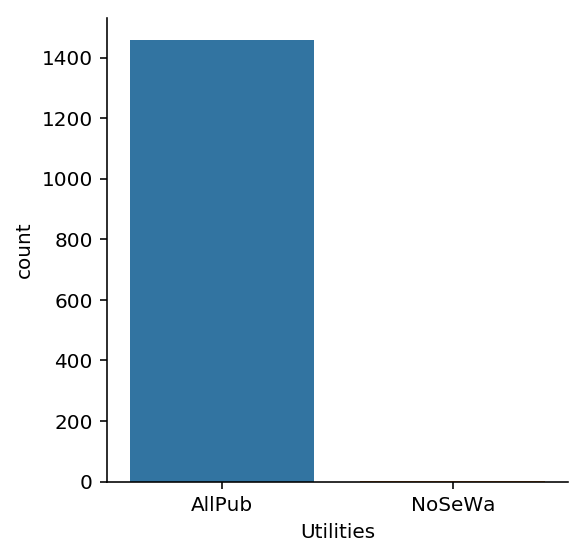

In [27]:
# Utilities 칼럼의 values count
sns.factorplot(data=hp, x='Utilities', kind='count')

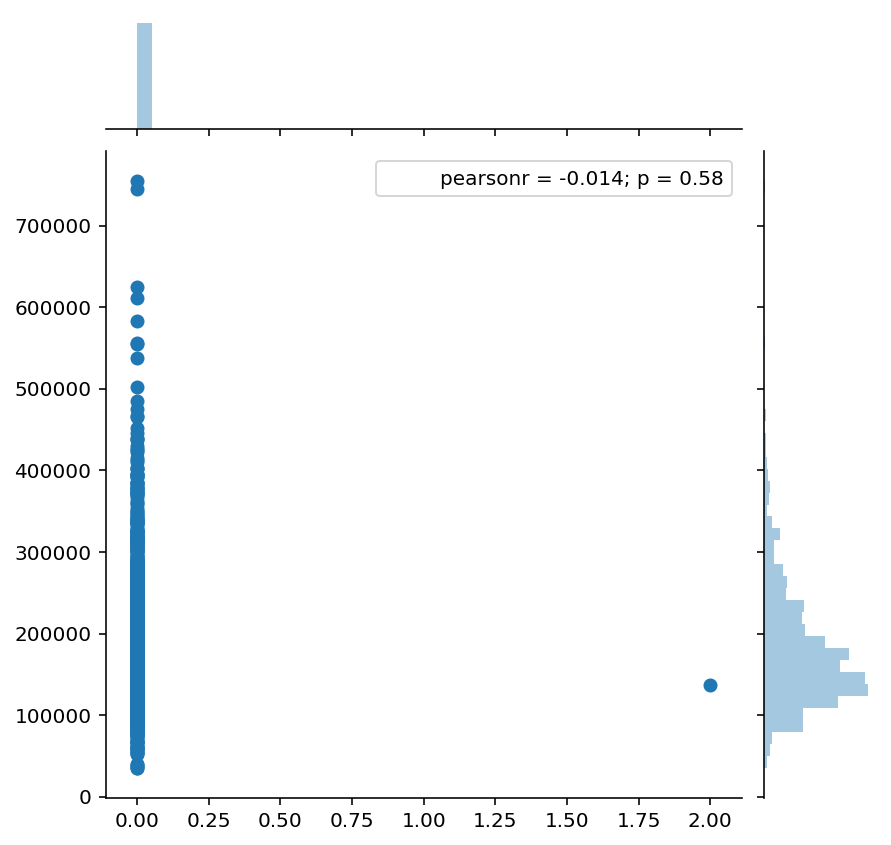

In [28]:
# Utilities 칼럼의 target 과의 상관관계 
sns.jointplot(x=hp6.values, y=hp.SalePrice.values)

* 10) LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac (closed at one end)
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property	
       


In [29]:
# 전처리 
def f7(char):
    if char == 'Inside':
        return 0 
    elif char == 'Corner':
        return 1 
    elif char == 'CulDSac':
        return 2
    elif char == 'FR2':
        return 3
    elif char == 'FR3':
        return 4
    
hp7 = hp['LotConfig'].apply(f7)
hp7.tail()

1455    0
1456    0
1457    0
1458    0
1459    0
Name: LotConfig, dtype: int64

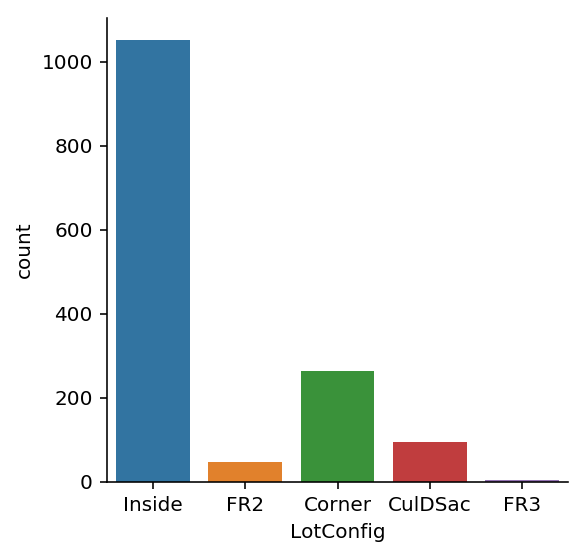

In [30]:
# LotConfig 칼럼의 values count
sns.factorplot(x='LotConfig', kind='count', data=hp)

In [31]:
hp.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

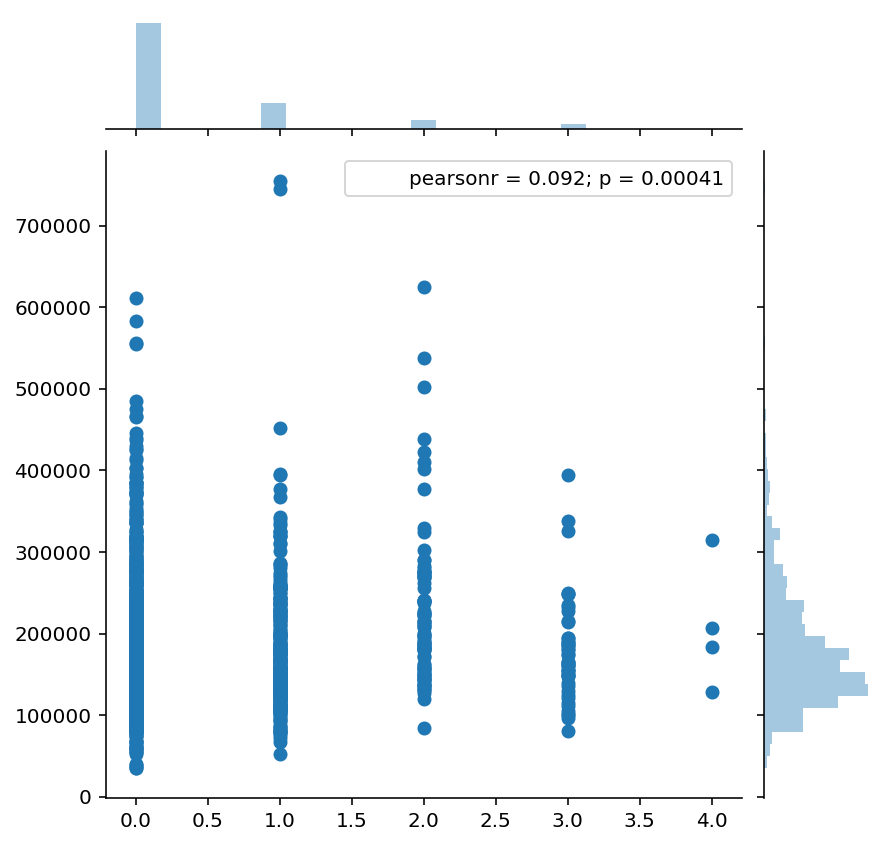

In [32]:
# LotConfig 칼럼의 target 과의 상관관계 
sns.jointplot(x=hp7.values, y=hp.SalePrice.values)

* 11) LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope	
       


In [33]:
# 전처리 
def f8(char):
    if char == 'Gtl':
        return 0 
    elif char == 'Mod':
        return 1
    elif char == 'Sev':
        return 2
    
hp8 = hp['LandSlope'].apply(f8)
hp8.tail()

1455    0
1456    0
1457    0
1458    0
1459    0
Name: LandSlope, dtype: int64

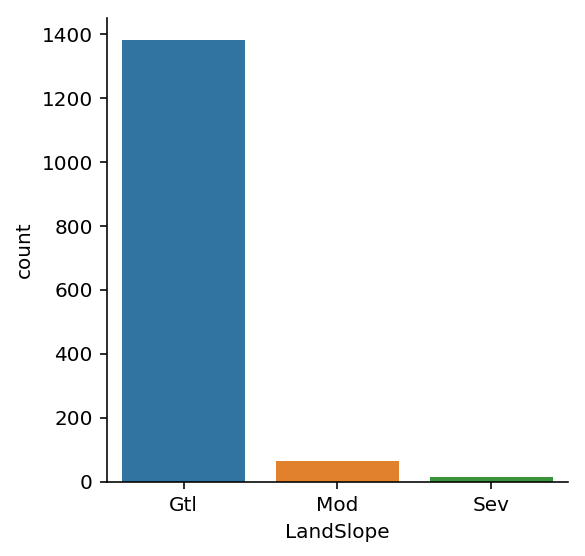

In [34]:
# LandSlope 칼럼의 value counts
sns.factorplot(data=hp, kind='count', x='LandSlope')

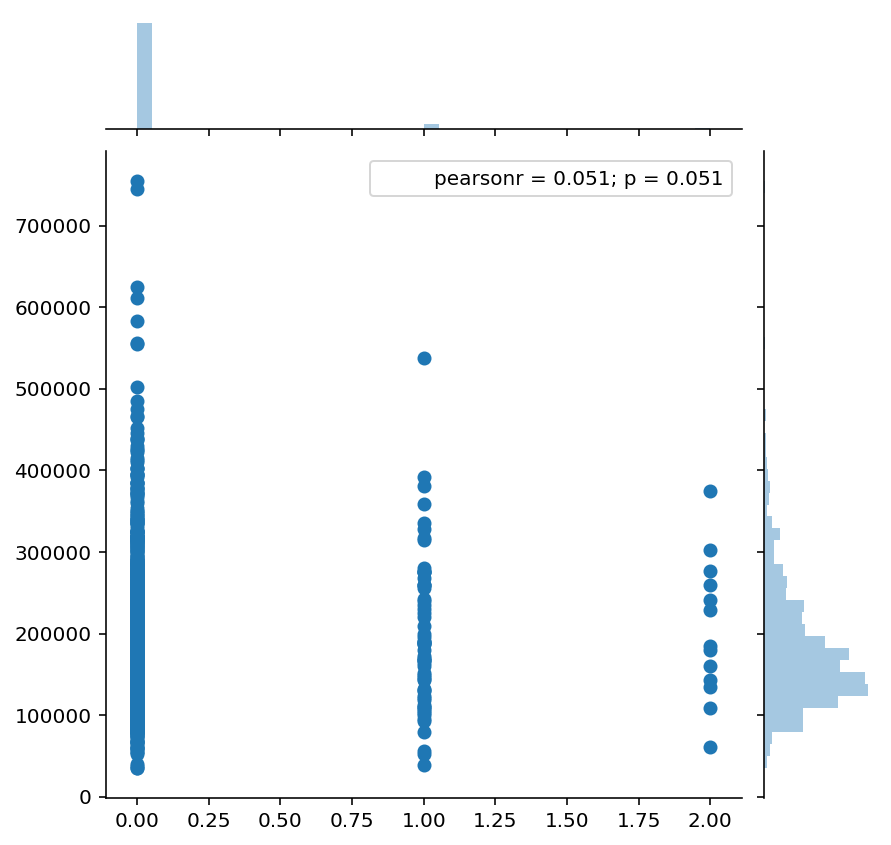

In [35]:
# LandSlope 칼럼의 target 과의 상관관계 
sns.jointplot(x=hp8.values, y=hp.SalePrice.values)

* 12) Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker	
       


In [36]:
# 전처리 
def f9(char):
    if char == 'Blmngtn':
        return 0 
    elif char == 'Blueste':
        return 1
    elif char == 'BrDale':
        return 2
    elif char == 'BrkSide':
        return 3
    elif char == 'ClearCr':
        return 4
    elif char == 'CollgCr':
        return 5
    elif char == 'Crawfor':
        return 6
    elif char == 'Edwards':
        return 7
    elif char == 'Gilbert':
        return 8
    elif char == 'IDOTRR':
        return 9
    elif char == 'MeadowV':
        return 10
    elif char == 'Mitchel':
        return 11
    elif char == 'Names':
        return 12
    elif char == 'NoRidge':
        return 13
    elif char == 'NPkVill':
        return 14
    elif char == 'NridgHt':
        return 15
    elif char == 'NWAmes':
        return 16
    elif char == 'OldTown':
        return 17
    elif char == 'SWISU':
        return 18
    elif char == 'Sawyer':
        return 19
    elif char == 'SawyerW':
        return 20 
    elif char == 'Somerst':
        return 21
    elif char == 'StoneBr':
        return 22
    elif char == 'Timber':
        return 23
    elif char == 'Veenker':
        return 24
    
hp9 = hp['Neighborhood'].apply(f9)
hp9.tail() 

1455     8.0
1456    16.0
1457     6.0
1458     NaN
1459     7.0
Name: Neighborhood, dtype: float64

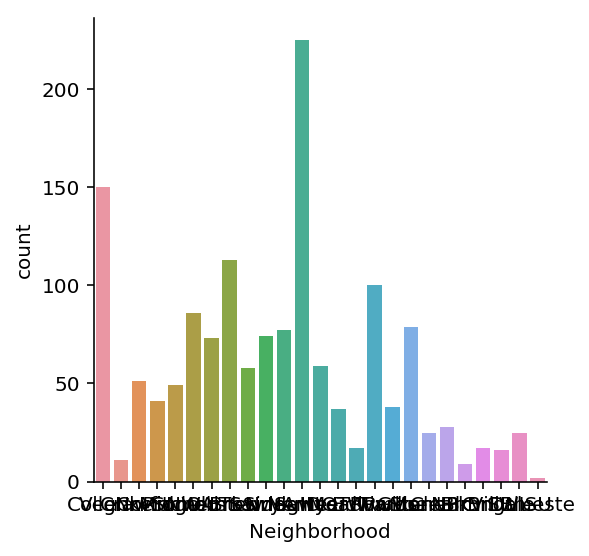

In [37]:
# NeighborHood 칼럼의 value counts
sns.factorplot(x='Neighborhood', data=hp, kind='count')

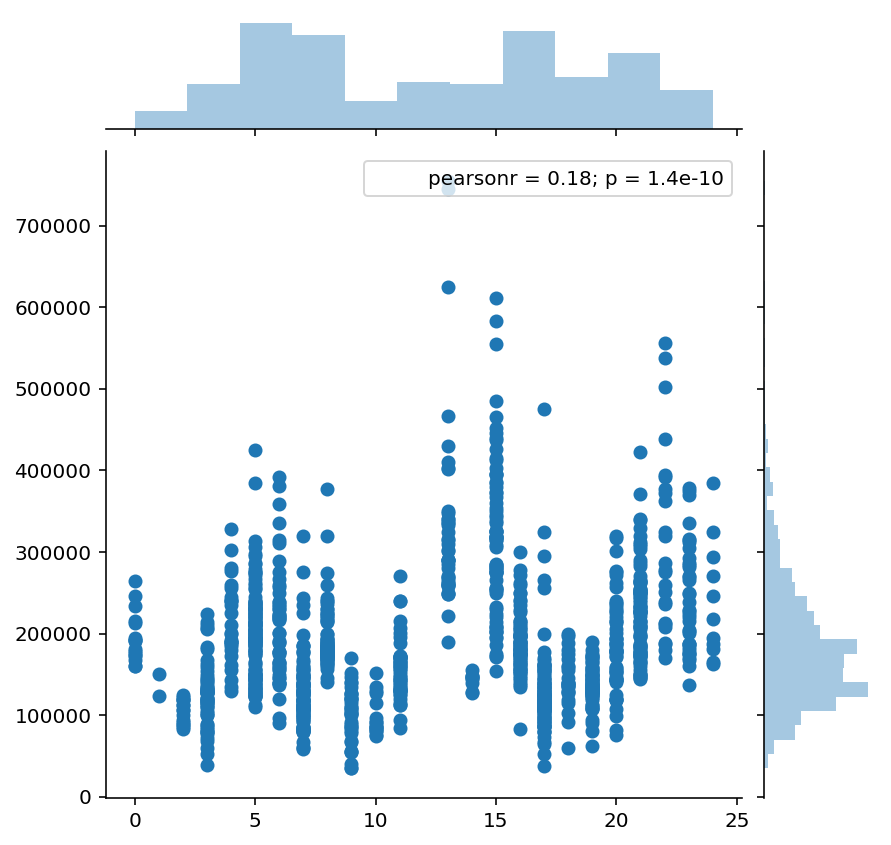

In [38]:
# NeighborHood 칼럼의 target 과의 상관관계 
sns.jointplot(x=hp9.values, y=hp.SalePrice.values)

* 13) Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad	
       


In [39]:
# 전처리 

def f10(char):
    if char == 'Artery':
        return 0 
    elif char == 'Feedr':
        return 1
    elif char == 'Norm':
        return 2
    elif char == 'RRNn':
        return 3
    elif char == 'RRAn':
        return 4
    elif char == 'PosN':
        return 5
    elif char == 'PosA':
        return 6
    elif char == 'RRNe':
        return 7
    elif char == 'RRAe':
        return 8
    
hp10 = hp['Condition1'].apply(f10)
hp10.tail()

1455    2
1456    2
1457    2
1458    2
1459    2
Name: Condition1, dtype: int64

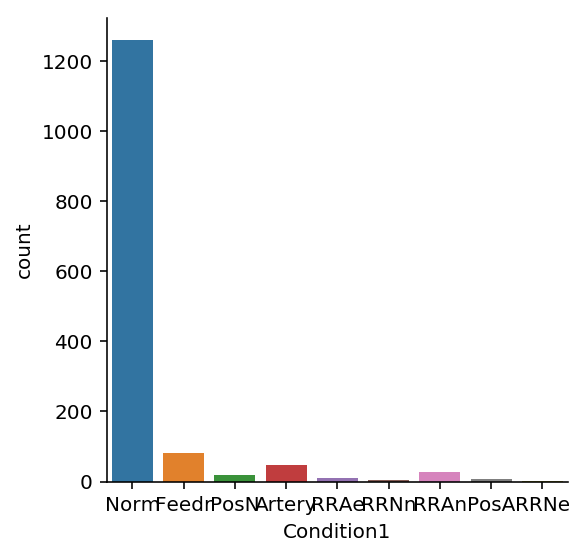

In [40]:
# Condition1 칼럼의 value counts
sns.factorplot(x='Condition1', kind='count', data=hp)

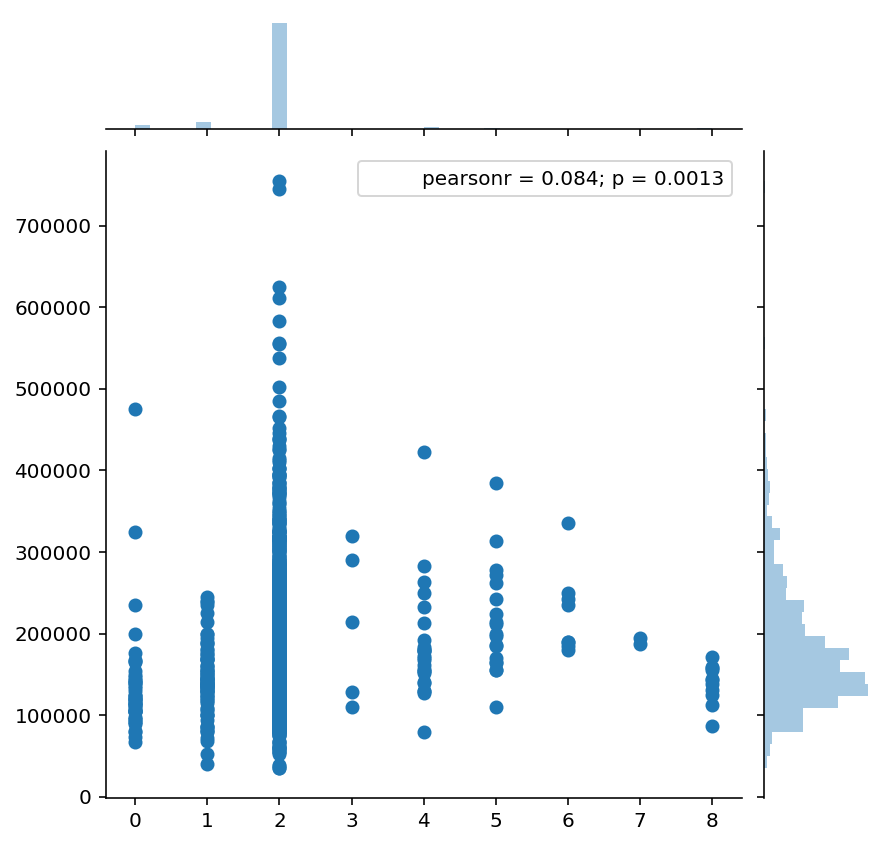

In [41]:
# Condition1 칼럼의 target 과의 상관관계
sns.jointplot(x=hp10.values, y=hp.SalePrice.values)

* 14) Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad	
       


In [42]:
# 전처리 

def f11(char):
    if char == 'Artery':
        return 0
    elif char == 'Feedr':
        return 1
    elif char == 'Norm':
        return 2
    elif char == 'RRNn':
        return 3
    elif char == 'RRAn':
        return 4
    elif char == 'PosN':
        return 5
    elif char == 'PosA':
        return 6
    elif char == 'RRNe':
        return 7
    elif char == 'RRAe':
        return 8
    
hp11 = hp['Condition2'].apply(f11)
hp11.tail()

1455    2
1456    2
1457    2
1458    2
1459    2
Name: Condition2, dtype: int64

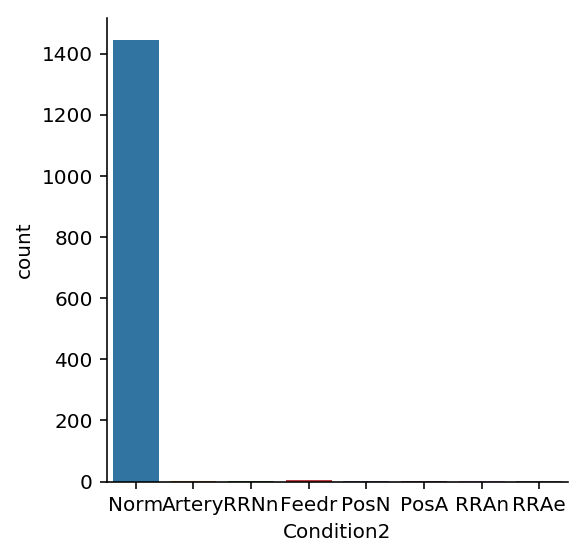

In [43]:
# Condition2 칼럼의 value counts
sns.factorplot(x='Condition2', data=hp, kind='count')

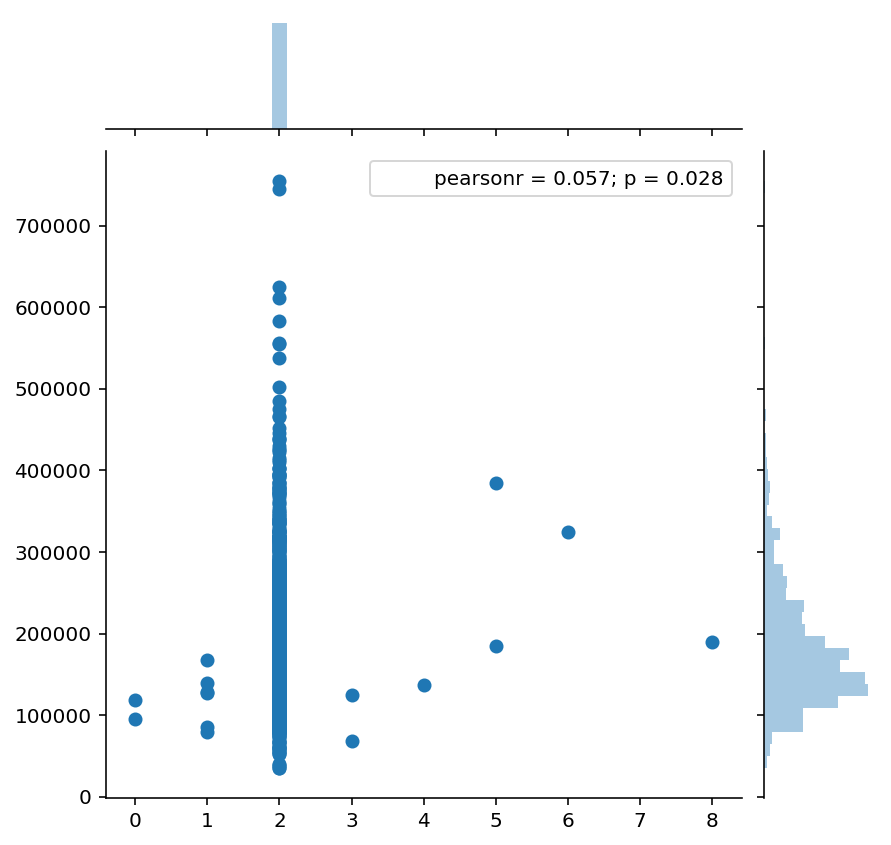

In [44]:
# Condition2 칼럼의 target 과의 상관관계 
sns.jointplot(x=hp11.values, y=hp.SalePrice.values)

* 15) BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit	
       


In [45]:
# 전처리 

def f12(char):
    if char == 'BldgType':
        return 0
    elif char == '1Fam':
        return 1
    elif char == '2FmCon':
        return 2
    elif char == 'Duplx':
        return 3
    elif char == 'TwnhsE':
        return 4
    elif char == 'TwnhsI':
        return 5
    
hp12 = hp['BldgType'].apply(f12)
hp12.tail()

1455    1.0
1456    1.0
1457    1.0
1458    1.0
1459    1.0
Name: BldgType, dtype: float64

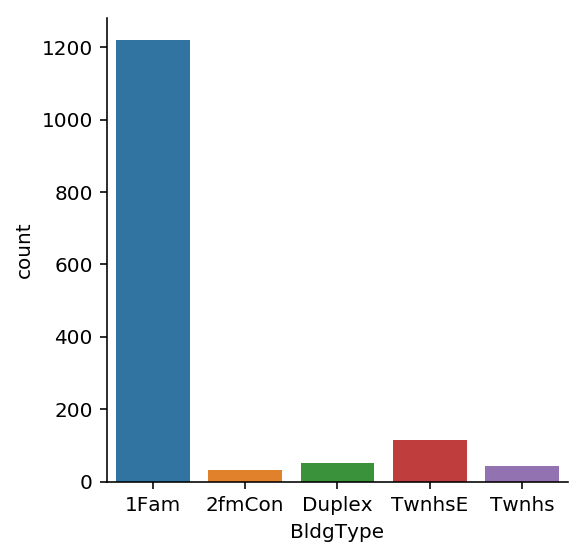

In [46]:
# BldgType 칼럼의 value count
sns.factorplot(x='BldgType', data=hp, kind='count')

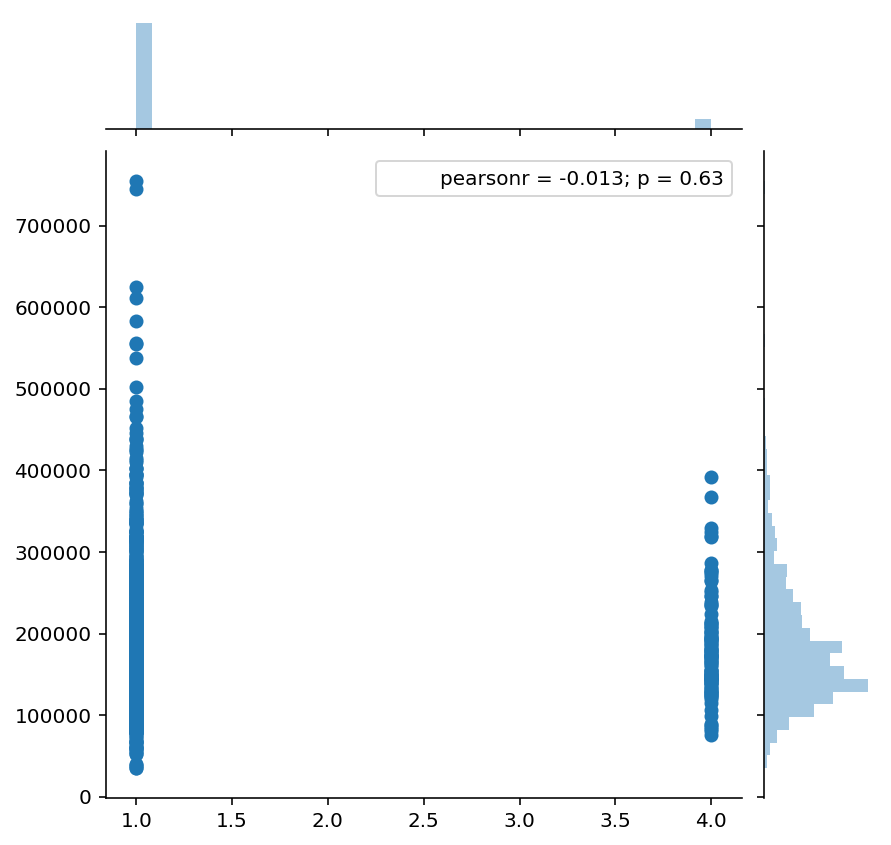

In [47]:
# BldgType 칼럼의 target 과의 상관관계 
sns.jointplot(x=hp12.values, y=hp.SalePrice.values)

* 16) HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level	
       


In [48]:
# 전처리 

def f13(char):
    if char == '1Story':
        return 0 
    elif char == '1.5Fin':
        return 1
    elif char == '1.5Unf':
        return 2
    elif char == '2Story':
        return 3
    elif char == '2.5Fin':
        return 4
    elif char == '2.5Unf':
        return 5 
    elif char == 'SFoyer':
        return 6
    elif char == 'SLvl':
        return 7
    
hp13 = hp['HouseStyle'].apply(f13)
hp13.tail()

1455    3
1456    0
1457    3
1458    0
1459    0
Name: HouseStyle, dtype: int64

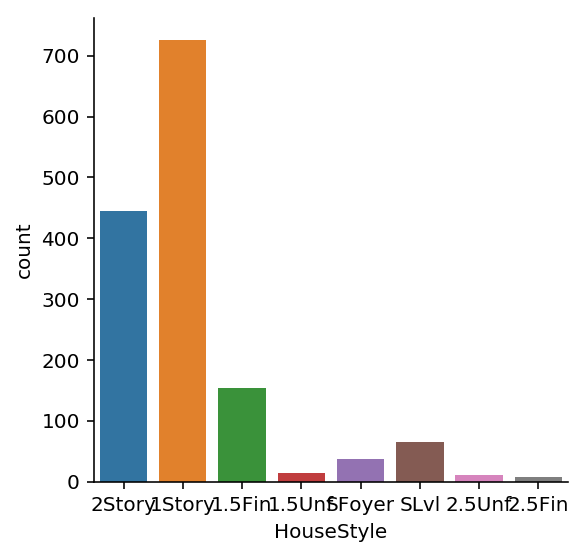

In [49]:
# HouseStyle 칼럼의 value counts
sns.factorplot(x='HouseStyle', data=hp, kind='count')

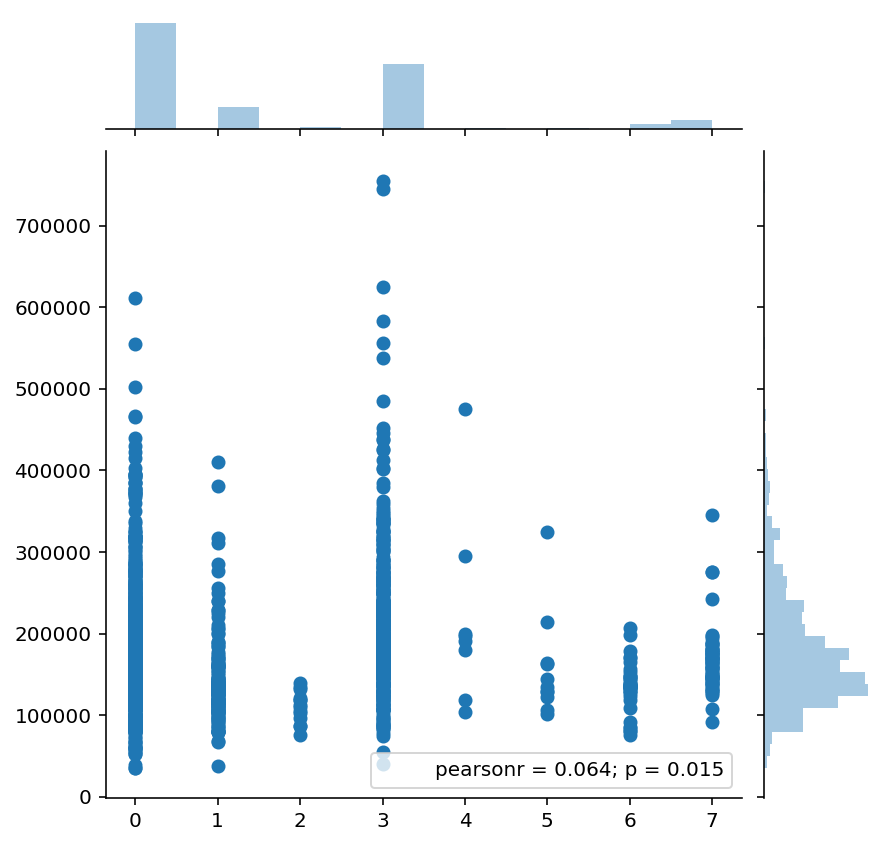

In [50]:
# HouseStyle 칼럼의 target 과의 상관관계 
sns.jointplot(x=hp13.values, y=hp.SalePrice.values)

* 17) OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor	
       


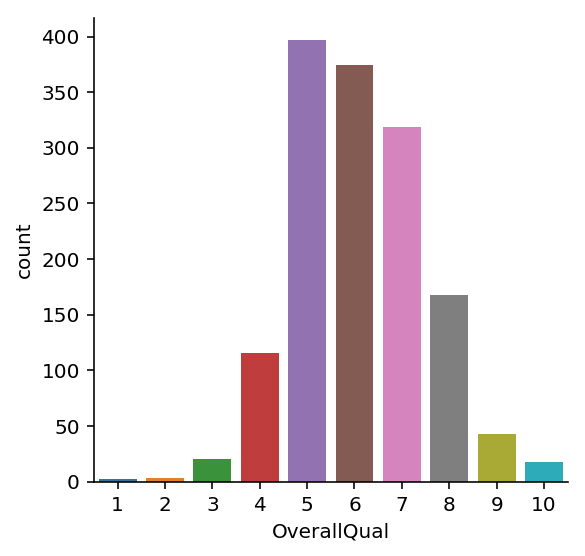

In [51]:
# OverallQual 칼럼의 value counts
sns.factorplot(x='OverallQual', kind='count', data=hp)

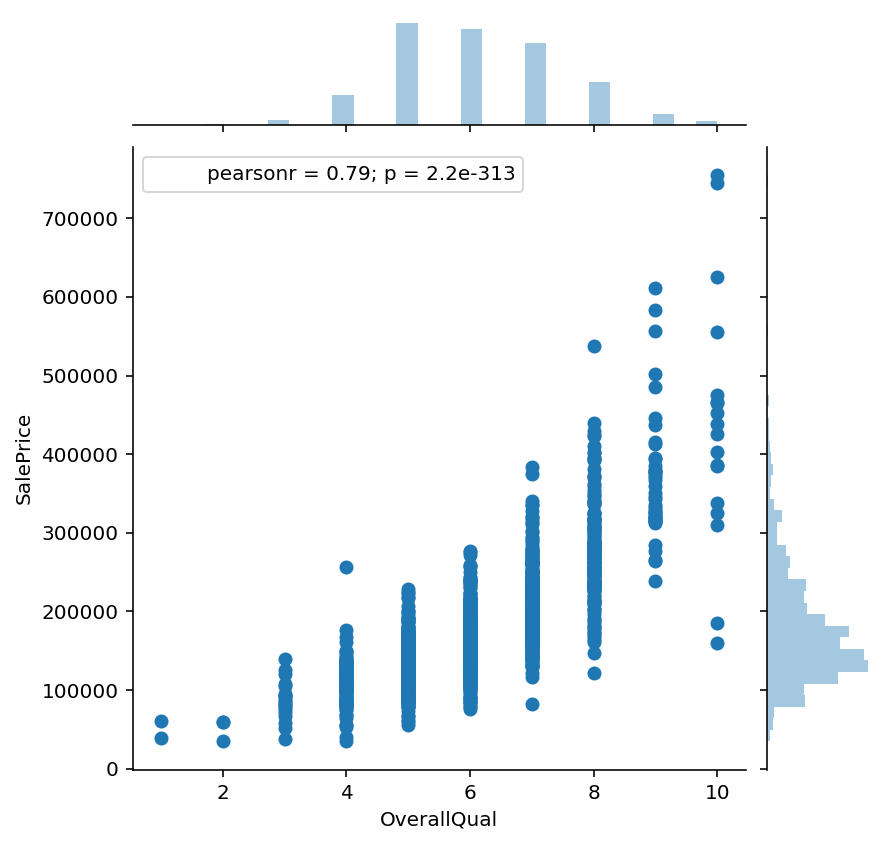

In [52]:
# OverallQual 칼럼의 target 과의 상관관계 
sns.jointplot(x='OverallQual', y='SalePrice', data=hp)

* 18) OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor	
       


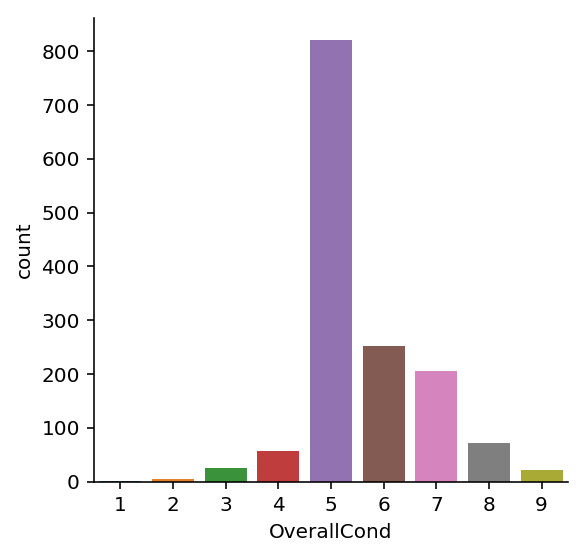

In [53]:
# OverallCond 칼럼의 value counts
sns.factorplot(x='OverallCond', data=hp, kind='count')

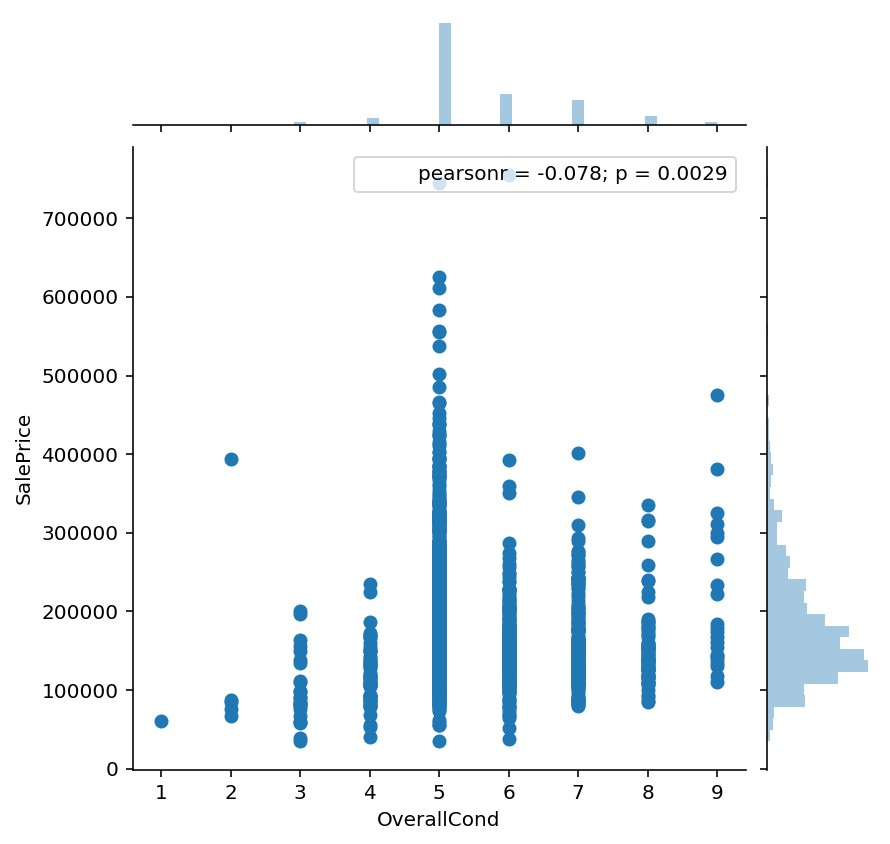

In [54]:
# OverallCond 칼럼의 target 과의 상관관계 
sns.jointplot(x='OverallCond', data=hp, y='SalePrice')

* 19) YearBuilt: Original construction date	
       


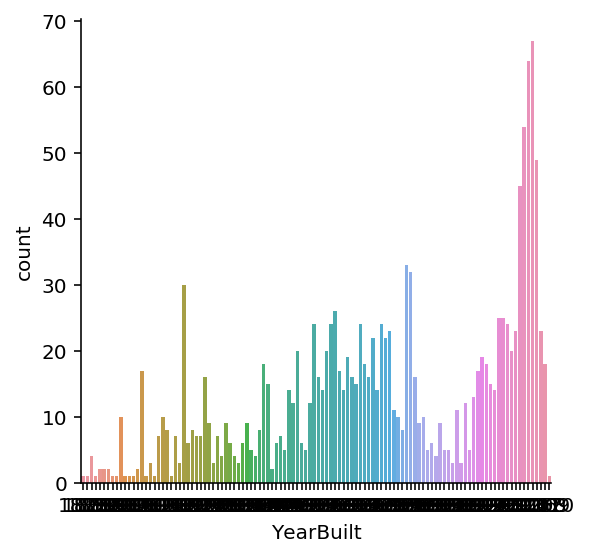

In [55]:
# YearBulit 칼럼의 value counts
sns.factorplot(x='YearBuilt', data=hp, kind='count')

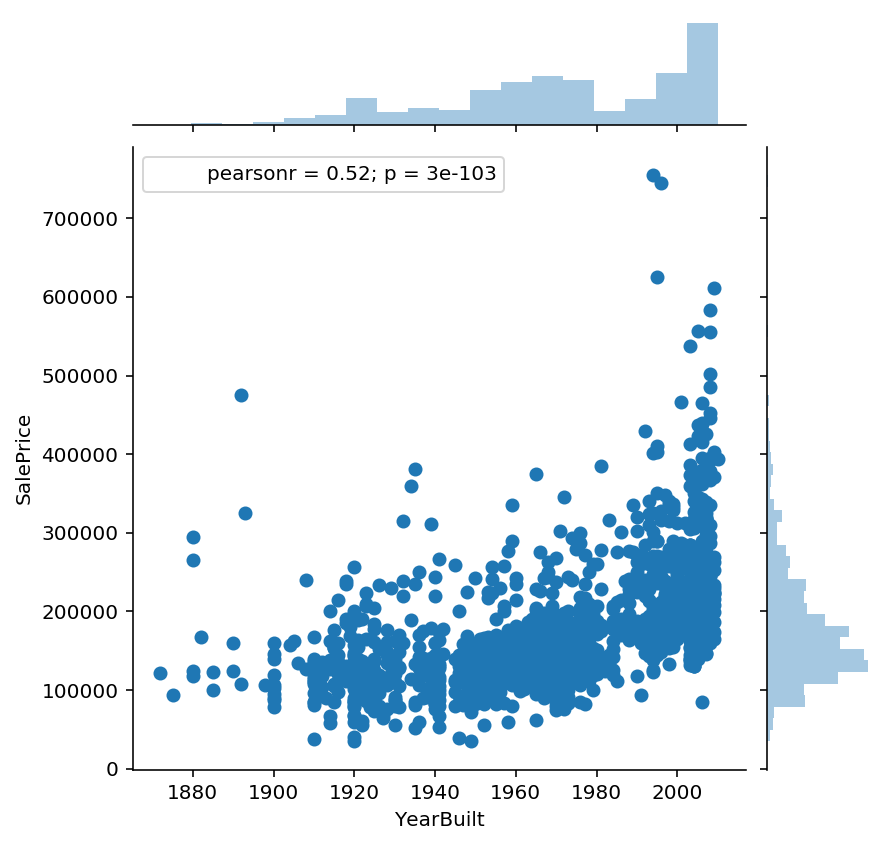

In [56]:
# YearBuilt 칼럼의 target 과의 상관관계 
sns.jointplot(x='YearBuilt', data=hp, y='SalePrice')

* 20) YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
       


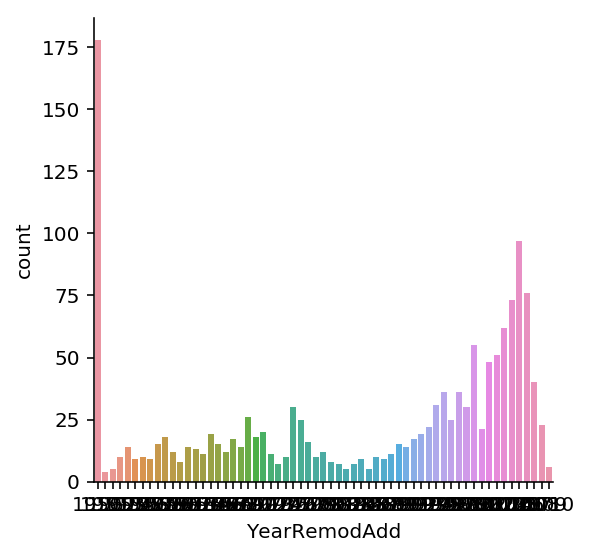

In [57]:
# YearRemodAdd 칼럼의 value count
sns.factorplot(x='YearRemodAdd', data=hp, kind='count')

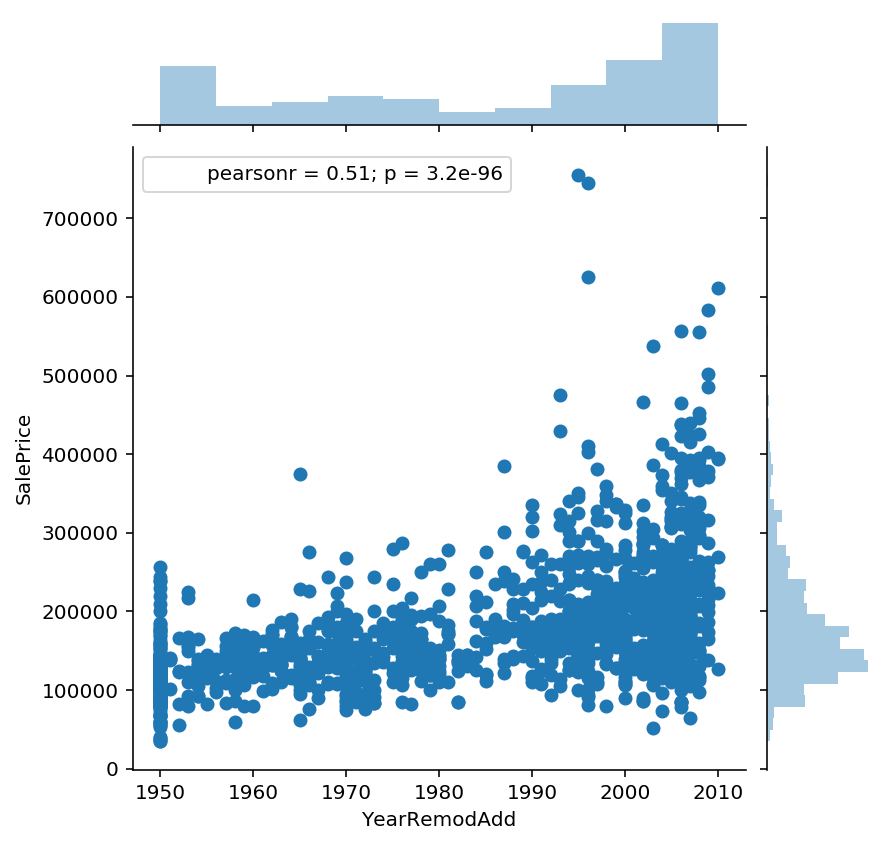

In [58]:
# YearRemodAdd 칼럼의 target과의 상관관계 
sns.jointplot(x='YearRemodAdd', y='SalePrice', data=hp)

## EDA요약 ) 
```
DataFrame의 1~20번 컬럼(MSSubClass~YearRemodAdd) 의 Target(SalePrice) 과의 상관관계를 분석한 결과 
OverallQual(0.790982), YearBuilt(0.522897), YearRemodAdd(0.507101) 세컬럼만이 양음상관관계(-1 ~ 1)를 망론하고 유일하게 0.5 이상을 
기록했다. 

* OverallQual : 전반적인 하우스 품질 (재질material, 마감finish)
* YearBuilt : 건축일
* YearRemodAdd : 리모델링일 (만일 리모델링이나 추가적인 증설addition이 없었다면 '건축일'을 입력하였음) 
```


In [59]:
# 전처리한 컬럼을 기존 컬럼과 concat 하여 상관관계를 살펴보기 위한 준비 단계 수행
hpfnl = pd.concat([hp['MSSubClass'], hp1, hp['LotFrontage'], hp['LotArea'], hp2, hp3, hp4, hp5, hp6, 
          hp7, hp8, hp9, hp10, hp11, hp12, hp13, hp['OverallQual'], hp['OverallCond'], hp['YearBuilt'], hp['YearRemodAdd'], hp['SalePrice']], axis=1)
hpfnl.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
1455,60,5.0,62.0,7917,1,2,0,0.0,0,0,...,8.0,2,2,1.0,3,6,5,1999,2000,175000
1456,20,5.0,85.0,13175,1,2,0,0.0,0,0,...,16.0,2,2,1.0,0,6,6,1978,1988,210000
1457,70,5.0,66.0,9042,1,2,0,0.0,0,0,...,6.0,2,2,1.0,3,7,9,1941,2006,266500
1458,20,5.0,68.0,9717,1,2,0,0.0,0,0,...,NaN,2,2,1.0,0,5,6,1950,1996,142125
1459,20,5.0,75.0,9937,1,2,0,0.0,0,0,...,7.0,2,2,1.0,0,5,6,1965,1965,147500


In [60]:
# 컬럼간의 상관관계 파악 
hpcor = hpfnl.corr()
hpcor

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
MSSubClass,1.000000,0.086898,-0.386347,-0.139781,-0.024969,-0.105995,-0.115361,-0.001982,-0.022844,-0.037573,...,-0.013040,-0.041052,-0.024080,0.763805,0.469623,0.032628,-0.059316,0.027850,0.040581,-0.084284
MSZoning,0.086898,1.000000,-0.169422,-0.069117,-0.018211,-0.109589,-0.116796,0.031634,-0.004093,-0.035777,...,-0.267473,-0.052155,0.012006,0.008824,-0.006404,-0.245114,0.180194,-0.423604,-0.242793,-0.259296
LotFrontage,-0.386347,-0.169422,1.000000,0.426095,-0.040886,0.138101,0.231878,0.082165,NaN,0.061085,...,0.094108,0.024424,0.045374,-0.383692,-0.026040,0.251646,-0.059213,0.123349,0.088866,0.351799
LotArea,-0.139781,-0.069117,0.426095,1.000000,-0.197131,0.060105,0.315484,0.173186,0.010123,0.131099,...,0.042285,0.038311,0.048534,-0.193400,-0.029586,0.105806,-0.005636,0.014228,0.013788,0.263843
Street,-0.024969,-0.018211,-0.040886,-0.197131,1.000000,-0.015720,-0.010129,-0.098238,0.001682,0.006905,...,-0.011109,-0.009938,0.001773,0.014513,0.013011,0.058823,0.042848,0.021137,0.065465,0.041036
Alley,-0.105995,-0.109589,0.138101,0.060105,-0.015720,1.000000,0.097078,-0.054601,0.006407,0.080177,...,-0.130810,0.097539,0.006754,-0.025470,-0.034394,0.099179,-0.098099,0.303155,0.073085,0.139868
LotShape,-0.115361,-0.116796,0.231878,0.315484,-0.010129,0.097078,1.000000,0.156692,0.026616,0.276675,...,0.013695,0.097331,0.009092,-0.061044,0.037859,0.198994,-0.033747,0.229365,0.175488,0.267759
LandContour,-0.001982,0.031634,0.082165,0.173186,-0.098238,-0.054601,0.156692,1.000000,-0.007325,-0.009715,...,0.001896,-0.028580,0.005770,-0.018857,-0.028953,0.049636,0.027958,-0.063443,-0.025096,0.059313
Utilities,-0.022844,-0.004093,NaN,0.010123,0.001682,0.006407,0.026616,-0.007325,1.000000,0.053620,...,0.046617,-0.000919,-0.000723,-0.008373,0.072876,-0.001881,0.009994,-0.011505,-0.034080,-0.014314
LotConfig,-0.037573,-0.035777,0.061085,0.131099,0.006905,0.080177,0.276675,-0.009715,0.053620,1.000000,...,0.043219,0.014387,-0.043419,-0.030625,0.051744,0.064471,0.012098,0.083126,0.075829,0.092316


In [61]:
# 상관관계지수가 높은 순으로 내림차순 정렬 
hpcor.iloc[20,:].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
LotFrontage     0.351799
LotShape        0.267759
LotArea         0.263843
Neighborhood    0.181309
Alley           0.139868
LotConfig       0.092316
Condition1      0.083838
HouseStyle      0.063547
LandContour     0.059313
Condition2      0.057490
LandSlope       0.051152
Street          0.041036
BldgType       -0.013137
Utilities      -0.014314
OverallCond    -0.077856
MSSubClass     -0.084284
MSZoning       -0.259296
Name: SalePrice, dtype: float64

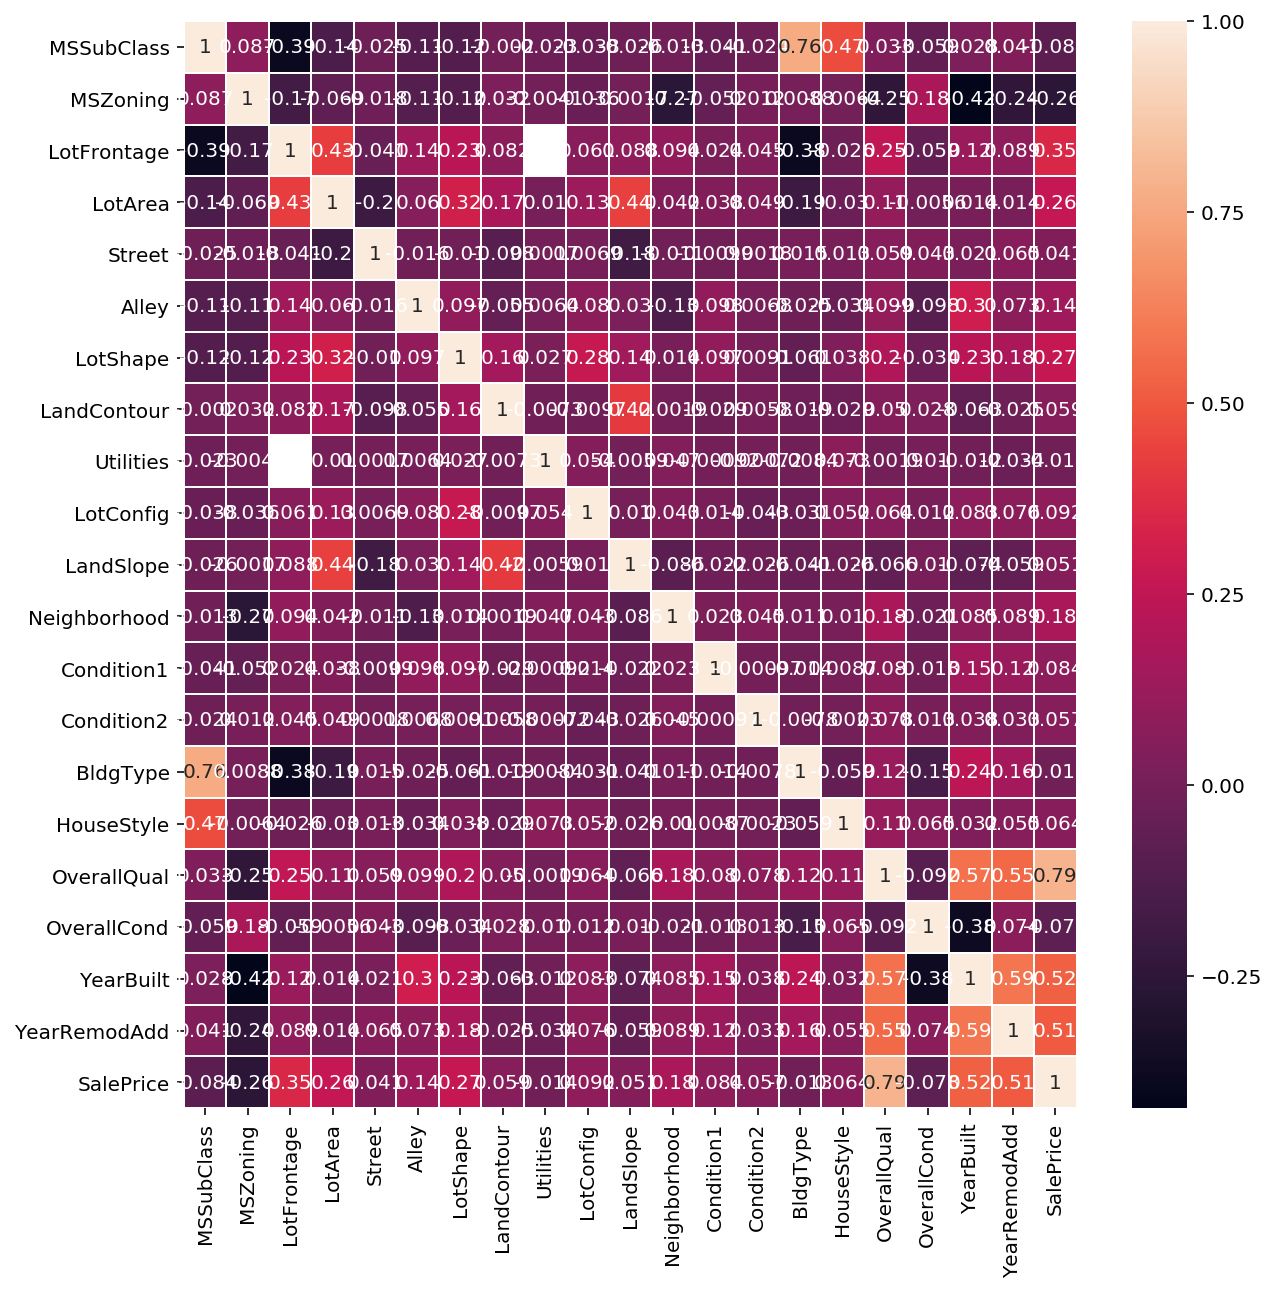

In [62]:
# heatmap 으로 상관관계 시각화 
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(hpcor, annot=True, linewidths=.5, ax=ax)